# **Housing Prices**  

@sofiagerard  
Enero 2025



**1️⃣ Carga de Datos**  
**2️⃣ Análisis Exploratorio de Datos (EDA)**  
   - **2.1. Información General**  
   - **2.2. Resumen Estadístico**  
   - **2.3. Análisis de Valores Nulos**  
   - **2.4. Distribución de `SalePrice`**  
   - **2.5. Identificación de Outliers**  
   - **2.6. Análisis de Correlaciones**  
   - **2.7. Relación entre Variables Numéricas y `SalePrice`**  
   - **2.8. Relación entre Variables Categóricas y `SalePrice`**    
- 
**3️⃣ Preprocesamiento**  
   - **3.1. Manejo de Valores Nulos**  
   - **3.2. Codificación de Variables Categóricas**  
   - **3.3. Normalización de Variables Numéricas** 
  
**4️⃣ Ingeniería de Características**  

**5️⃣ Selección de Variables**  

**6️⃣ Creación del Pipeline de Preprocesamiento**  

**7️⃣ Entrenamiento del Modelo**  
   - **7.1. Regresión Lineal (Modelo Baseline)**  
   - **7.2. XGBoost para Mejorar la Precisión**  
  
**8️⃣ Evaluación del Modelo**   

**9️⃣ Predicción en `df_test`**  

## Libraries

In [6]:
# Manipulación de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesamiento y modelado
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



## Data

In [8]:
print(os.getcwd())  # Muestra la ruta donde se está ejecutando el script

df_train = pd.read_csv("../data/train.csv")  #
df_train.head()

df_test = pd.read_csv("../data/test.csv")
df_test.head()

/Users/sofiagerard/Github/ITAM/tarea02_housing_sgr/notebooks


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# First look

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [12]:
df_train.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [14]:
missing_values = df_train.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)



LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


/var/folders/8v/p9jmdytd6y36kdsq55l4_cqw0000gn/T/ipykernel_33549/1138772913.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values.values, palette="Reds_r")


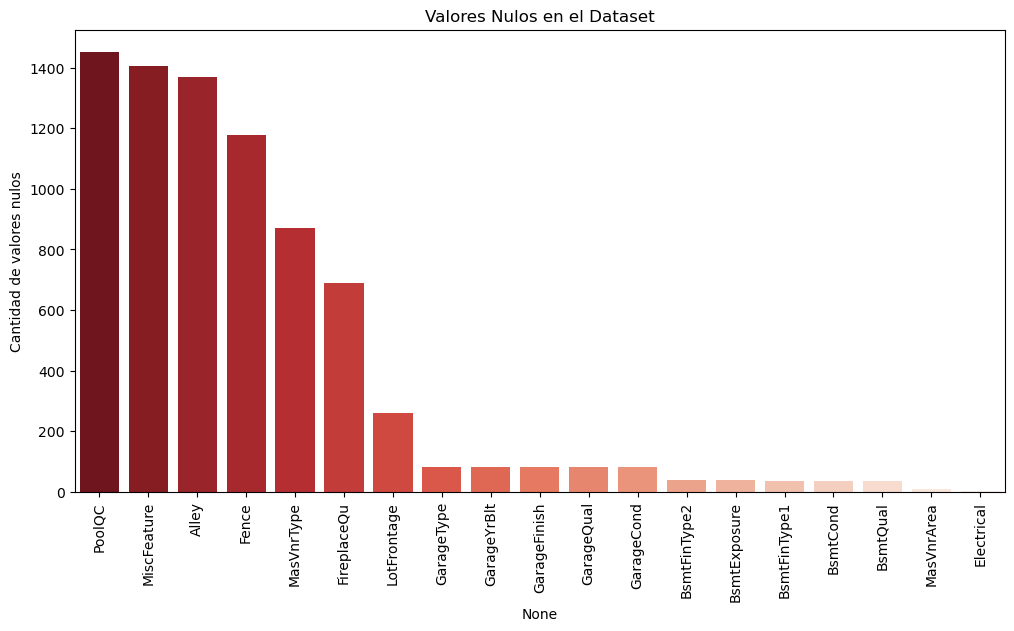

In [21]:
# Contar valores nulos por variable
missing_values = df_train.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

# Visualizar valores nulos
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette="Reds_r")
plt.xticks(rotation=90)
plt.title("Valores Nulos en el Dataset")
plt.ylabel("Cantidad de valores nulos")
plt.show()


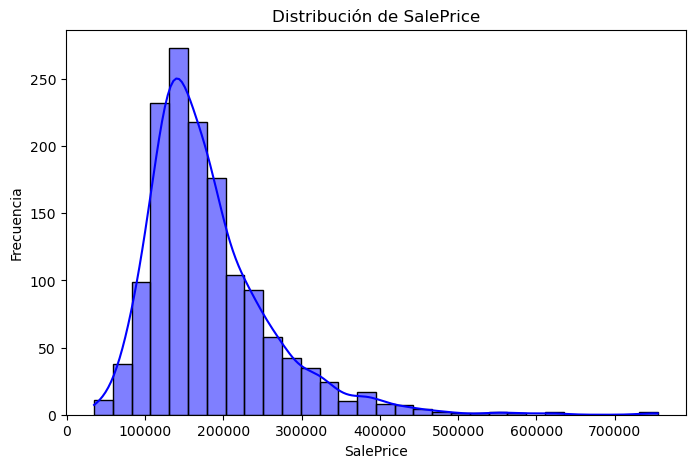

In [15]:
plt.figure(figsize=(8, 5))
sns.histplot(df_train["SalePrice"], bins=30, kde=True, color="blue")
plt.title("Distribución de SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Frecuencia")
plt.show()


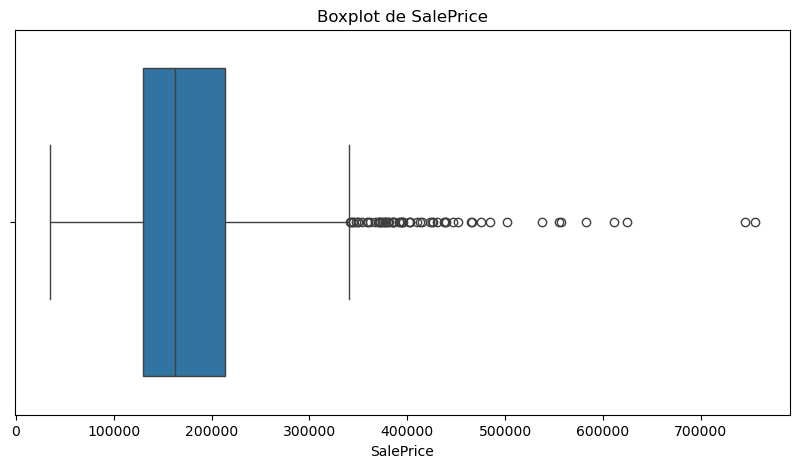

In [16]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_train["SalePrice"])
plt.title("Boxplot de SalePrice")
plt.show()


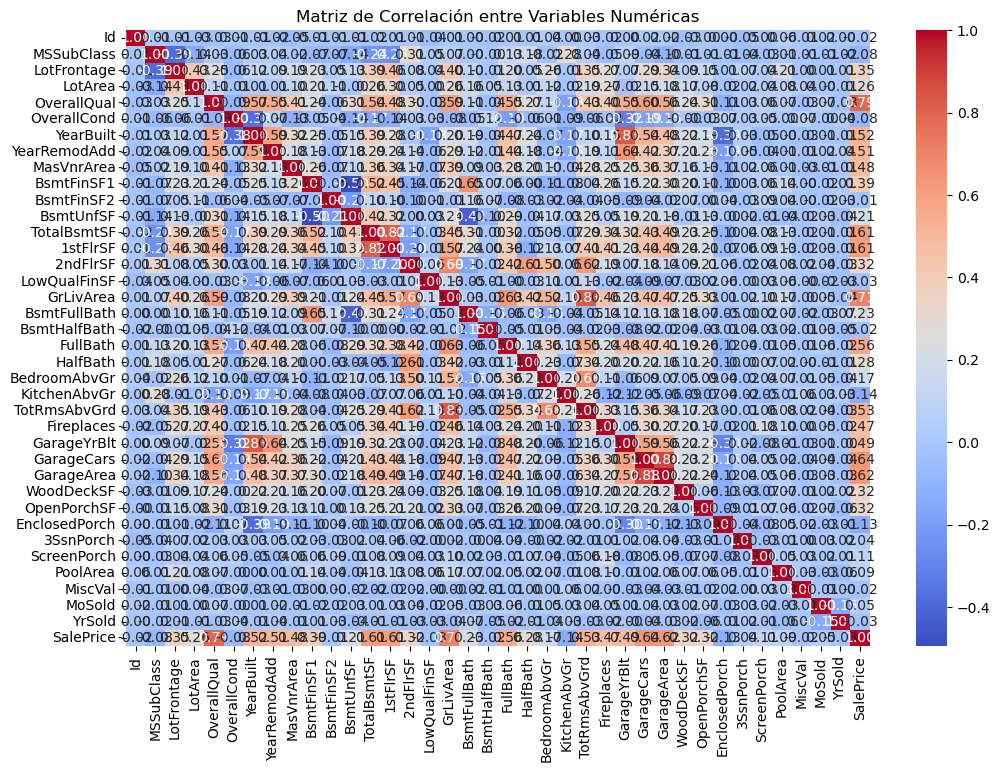

In [18]:
# Seleccionar solo columnas numéricas
df_numeric = df_train.select_dtypes(include=["float64", "int64"])

# Generar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()



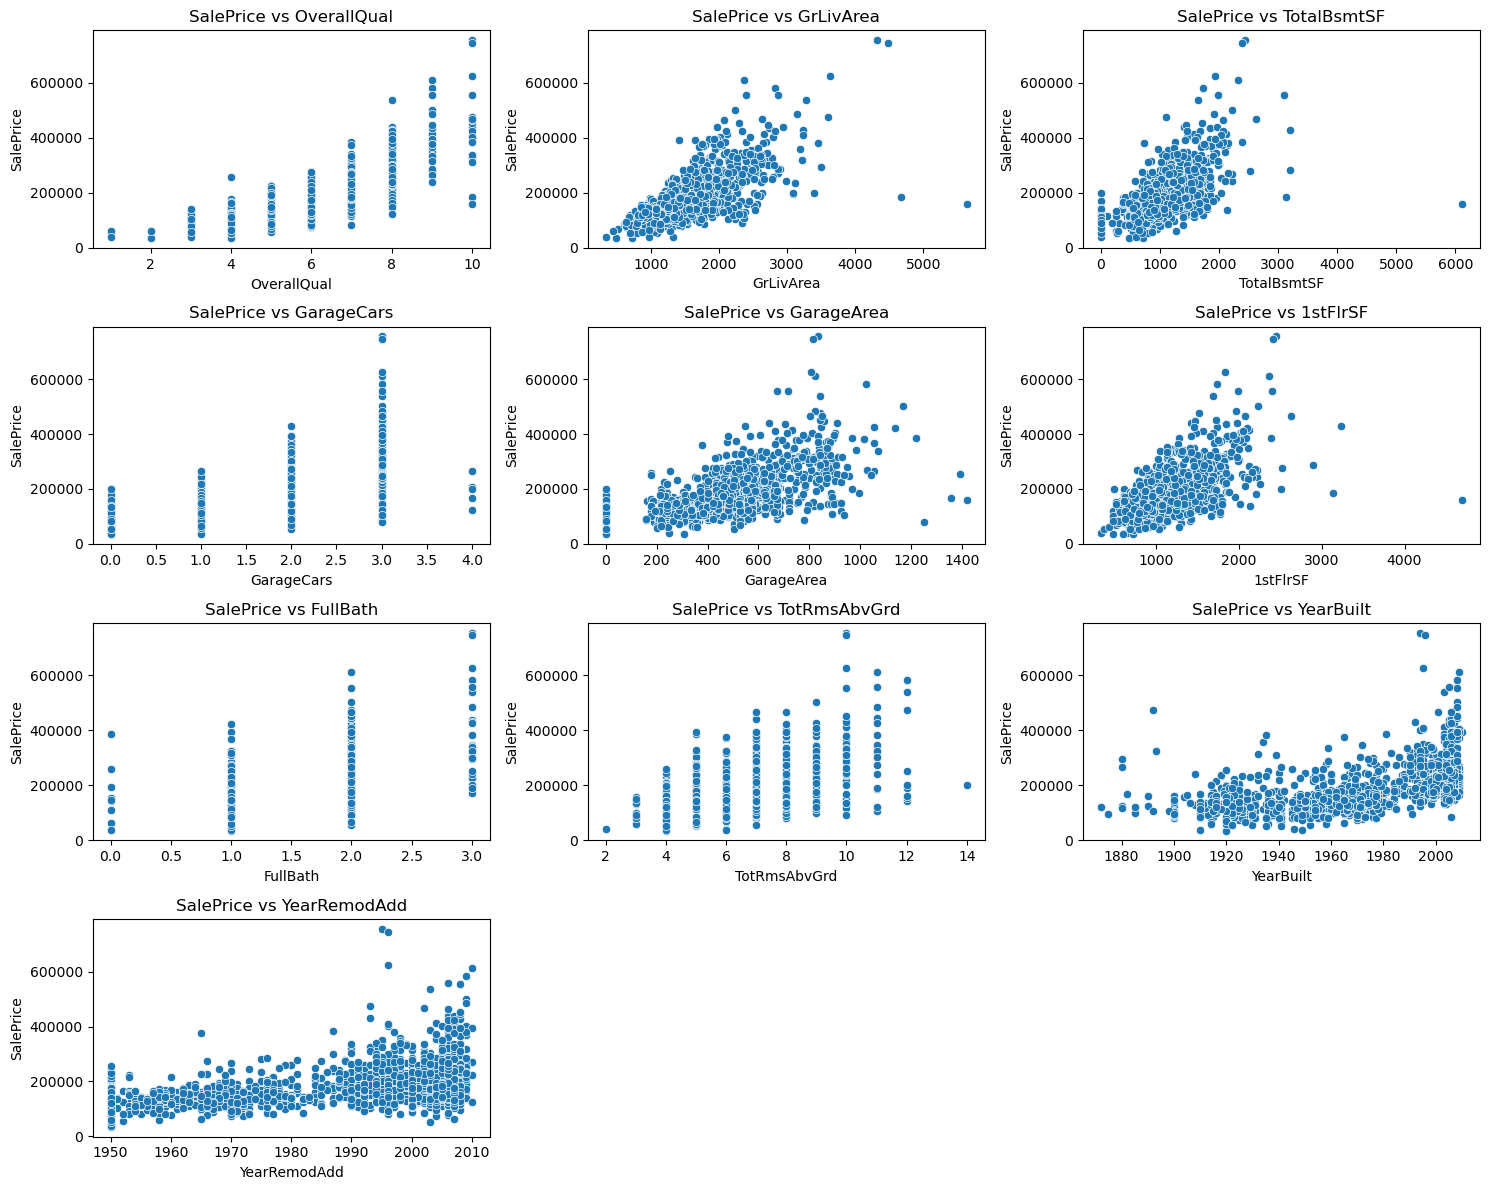

In [26]:
# Variables numéricas más relevantes según la matriz de correlación
numerical_features = [
    "OverallQual", "GrLivArea", "TotalBsmtSF", "GarageCars", "GarageArea",
    "1stFlrSF", "FullBath", "TotRmsAbvGrd", "YearBuilt", "YearRemodAdd"
]

# Visualización de la relación entre cada variable numérica y SalePrice
plt.figure(figsize=(15, 12))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 3, i)
    sns.scatterplot(x=df_train[feature], y=df_train["SalePrice"])
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    plt.title(f"SalePrice vs {feature}")

plt.tight_layout()
plt.show()



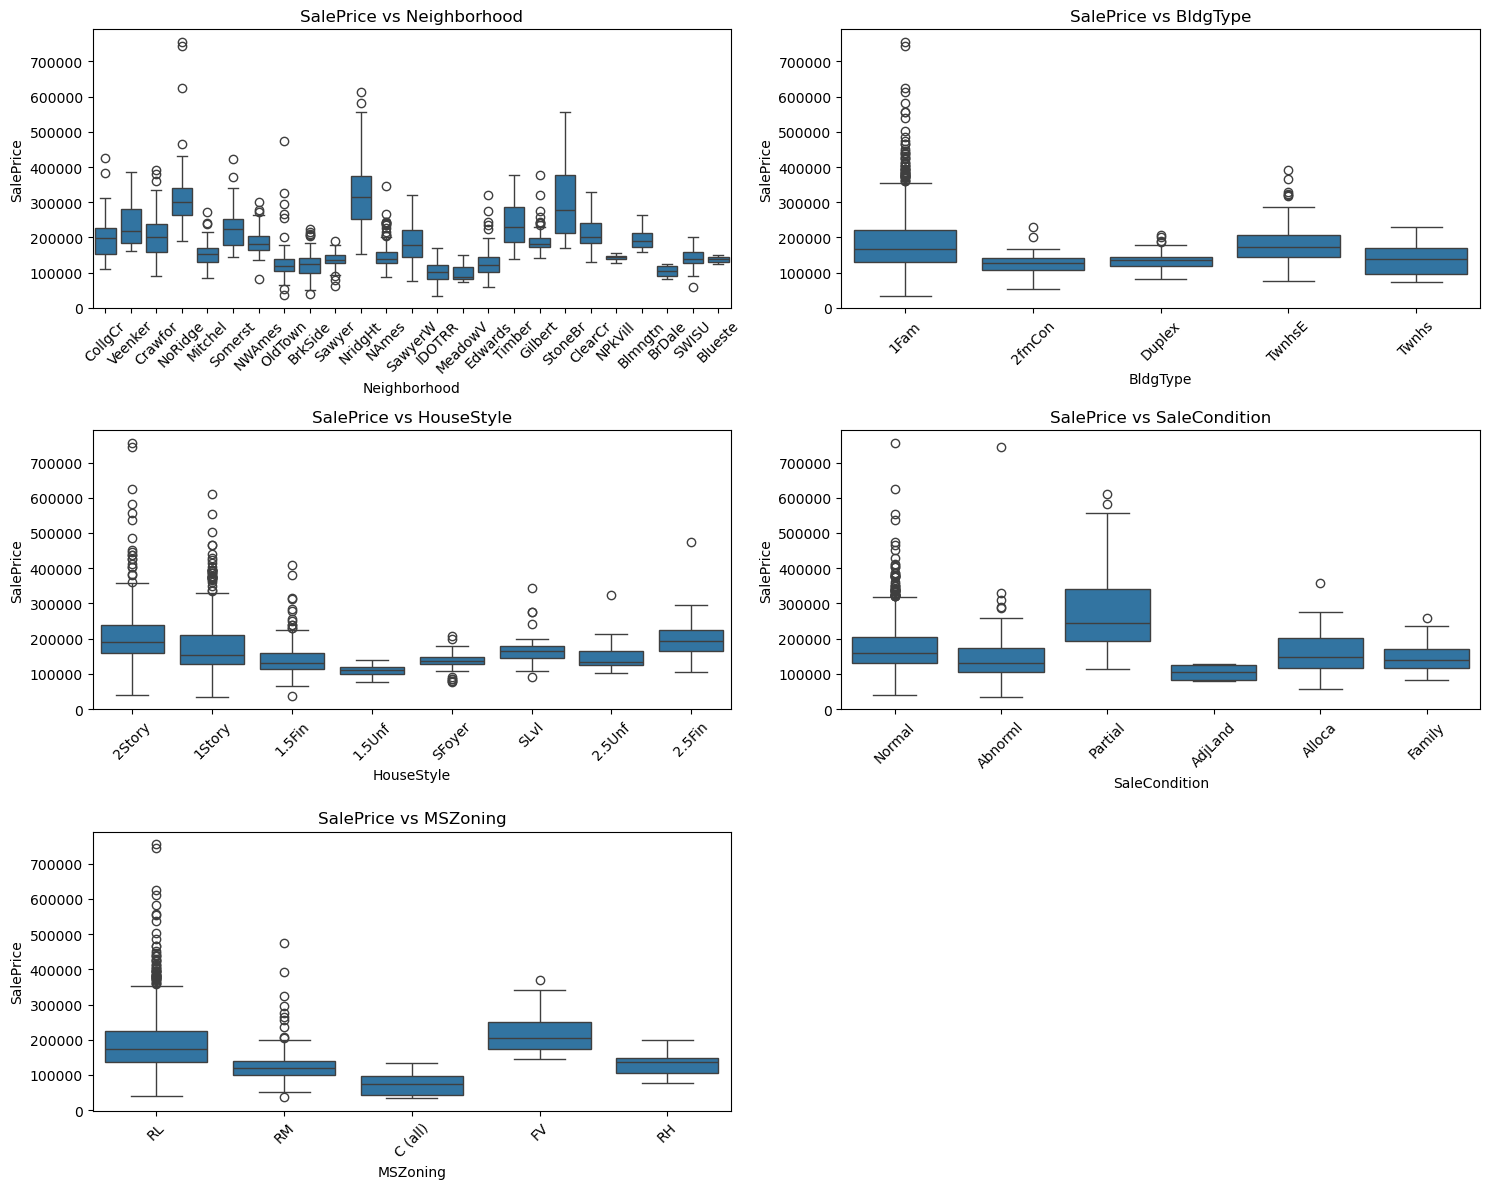

In [27]:
# Variables categóricas más relevantes según su impacto en SalePrice
categorical_features = [
    "Neighborhood", "BldgType", "HouseStyle", "SaleCondition", "MSZoning"
]

# Visualización de la relación entre cada variable categórica y SalePrice
plt.figure(figsize=(15, 12))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df_train[feature], y=df_train["SalePrice"])
    plt.xticks(rotation=45)
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    plt.title(f"SalePrice vs {feature}")

plt.tight_layout()
plt.show()
